<span style="font-size:110%; text-align:left;"><b><a href="../index.html">3.Gaussian Beams</a> > <a href="./index.html">1.Beam parameters</a></b></span>
<br/><br/>
<span style="font-size:200%; text-align:left;"><b>1.Gaussian beam parameters</b></span>
<br/><br/>
<span style="font-size:110%; text-align:left;">Author: Andreas Freise </span>

# Table of Contents
 <p><div class="lev1"><a href="#Introduction"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1"><a href="#Higher-order-spatial-modes"><span class="toc-item-num">2&nbsp;&nbsp;</span>Higher-order spatial modes</a></div><div class="lev1"><a href="#Hermite-Gauss-modes"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hermite-Gauss modes</a></div><div class="lev2"><a href="#Gaussian-beam-parameter"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gaussian beam parameter</a></div><div class="lev2"><a href="#Plotting-a-single-HG-mode"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plotting a single HG mode</a></div>

# Introduction

The analysis using a plane-wave approximation as described in the previous chapter allows one to perform a large variety of simulations. Some tasks, however, include the beam shape and position, i.e. the properties of the field transverse to the optical axis. The effects of misaligned components, for example, can only be computed if beam shape and position are taken into account.

The effects of spatial properties of optics on the beam shape and on interferometer signal can be computed using an expansion of the beam into higher-order spatial modes. This is a direct extension of the plane-wave analysis.

# Higher-order spatial modes

The electric field that can be described as a sum of the
different frequency components and of the different spatial modes:
$$E(t,x,y,z)~=~\sum_{j}~\sum_{n,m}~a_{jnm}~u_{nm}(x,y,z)~\exp(i(\omega_j t - k_j z)),$$
with $u_{nm}$ a function family describing spatial properties of a beam and $a_{jnm}$ as
complex amplitude factors ($\omega_j$ is the angular frequency of the light field
and $k_j=\omega_j/c$). 

The two most common function families to describe a beam are Hermite-Gauss (HG) modes and Laguerre-Gauss modes.



# Hermite-Gauss modes


Hermite-Gauss modes are usually given in their orthonormal form as:
$$
{\renewcommand{\arraystretch}{1.5}
\begin{array}{lcl}
u_{\rm
nm}(x,y,z)&=&\left(2^{n+m-1}n!m!\pi\right)^{-1/2}
\frac{1}{w(z)}~\exp(i(n+m+1)\Psi(z))\\
&&\times\qquad
H_n\left(\frac{\sqrt{2}x}{w(z)}\right)H_m\left(\frac{\sqrt{2}y}{w(z)}\right)
\exp(-i\frac{k(x^2+y^2)}{2R_{\rm C}(z)}-\frac{x^2+y^2}{w^2(z)}),
\end{array}}
$$
with $n$, $m$ being the \emph{mode numbers} or \emph{mode indices}. In this
case $n$ refers to the modes in the $y$-$z$ plane (saggital) and $m$ to the
$x$-$z$ plane (tangential). $H_n(x)$ are Hermite polynomial of the order $n$ 
(unnormalised), $w(z)$ the beam radius or spot size}, $R_{\rm C}(z)$ is the 
radius of curvature of the phase front} and $\Psi(z)$ the Gouy phase.

The most common laser beam is in a $u_{00}$ mode.


## Gaussian beam parameter

Each mode family can be fully defined by the laser wavelength and one comlex number, the Gaussian beam parameter $q$ defined as:
$$\frac{1}{q(z)}=\frac{1}{R_C(z)}-i\frac{\lambda}{\pi w^2(z)},$$
and can also be written as:
$$q(z)=iz_{\rm R} +z-z_0=q_0+z-z_0,\qquad\mbox{where}\qquad q_0=i z_{\rm R}.$$
The beam parameter $q_0$ is in general changed when the beam interacts with
a spherical surface.

Using this parameter the complete set HG modes can now be
written as:
$$u_{\rm nm}(x,y,z)=u_{\rm n}(x,z)u_{\rm m}(y,z),$$
with:
$$u_{\rm n}(x,z)=\left(\frac{2}{\pi}\right)^{1/4}\left(\frac{1}{2^nn!w_0}\right)^{1/2}
\left(\frac{q_0}{q(z)}\right)^{1/2}\left(\frac{q_0~q^*(z)}{q_0^*~q(z)}\right)^{n/2}
H_n\left(\frac{\sqrt{2}x}{w(z)}\right)
\exp(-i\frac{kx^2}{2q(z)})
$$

Pykat contains an Gaussian beam parameter object that can be used to define a beam shape and to extract other useful parameter such as beam size etc.

In [2]:
import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change dpi value 
# to change figure sizes on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.6           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [19]:
import pykat.optics.gaussian_beams as gb
# defining a beam parameter through waist size (w0) and distance to waist (z)
qx=gb.beam_param(w0=1e-3,z=10)
print("Radius of curvature = {0:.3} m".format(float(qx.Rc)))
print("Beam size = {0:.3e} m".format(float(qx.beamsize())))

Radius of curvature = 10.9 m
Beam size = 3.531e-03 m


## Plotting a single HG mode

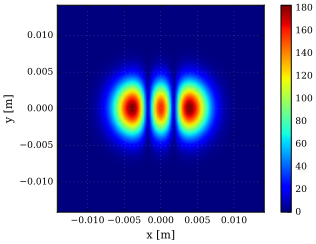

In [20]:
beam=gb.HG_beam(qx,n=2,m=0)
beam.plot()